# Cell simulation

In [89]:
import spateo as st
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Simulate cells

In [136]:
adata = st.pp.segmentation.simulation.simulate_cells(
    (1000, 1000),  # FOV shape
    200,           # Number of cells to simulate
    axis1_range=(7, 15), axis2_range=(5, 14),
    shift=3,
    foreground_params=(0.512, 1.96, 11.4),
    background_params=(0.921, 1.08, 1.74),
    seed=0
)

|-----> <insert> __type to uns in AnnData Object.
|-----> <insert> pp to uns in AnnData Object.
|-----> <insert> spatial to uns in AnnData Object.


|-----> <select> X layer in AnnData Object
|-----> <select> labels layer in AnnData Object


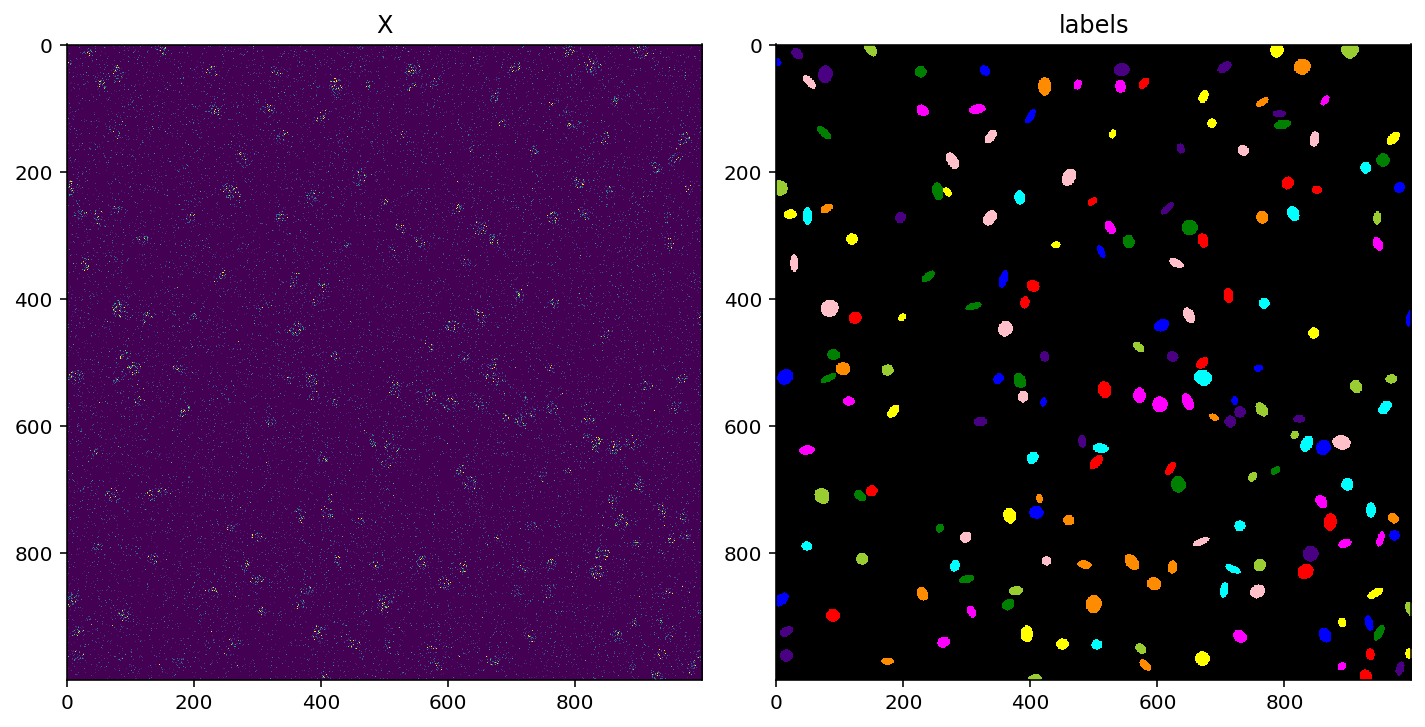

In [137]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5), tight_layout=True)
st.pl.imshow(adata, vmax=10, ax=axes[0])
st.pl.imshow(adata, 'labels', labels=True, ax=axes[1])

## Showcase a few different algorithms

In [133]:
# Simple Gaussian blur + thresholding
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=21, method='gauss',
    scores_layer='gauss_scores', mask_layer='gauss_mask'
)

# Negative Binomial mixture expectation maximization (EM)
# Arguments to EM algorithm can be changed with em_kwargs
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=7, method='EM',
    em_kwargs=dict(downsample=0.1, w=(0.5, 0.5), mu=(10., 300.), var=(20., 400.), max_iter=2000, precision=1e-6, seed=0),
    scores_layer='EM_scores', mask_layer='EM_mask'
)

# Negative Binomial mixture expectation maximization (EM) + belief propagation (BP)
# Arguments to EM and BP algorithms can be changed with em_kwargs and bp_kwargs
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=7, method='EM+BP',
    em_kwargs=dict(downsample=0.01, w=(0.5, 0.5), mu=(10., 300.), var=(20., 400.), max_iter=2000, precision=1e-6, seed=0),
    bp_kwargs=dict(k=3, square=False, p=0.6, q=0.4, precision=1e-6, max_iter=100),
    scores_layer='EM+BP_scores', mask_layer='EM+BP_mask'
)

# Negative Binomial mixture variational inference (VI) + belief propagation (BP)
# Arguments to VI and BP algorithms can be changed with vi_kwargs and bp_kwargs
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=7, method='VI+BP',
    vi_kwargs=dict(downsample=0.1, n_epochs=500, zero_inflated=False, seed=0),
    bp_kwargs=dict(k=3, square=False, p=0.6, q=0.4, precision=1e-6, max_iter=100),
    scores_layer='VI+BP_scores', mask_layer='VI+BP_mask'
)

# Moran's I
st.pp.segmentation.score_and_mask_pixels(
    adata, 'X', k=21, method='moran',
    moran_kwargs=dict(k=7, p_threshold=0.05),
    scores_layer='moran_scores', mask_layer='moran_mask'
)

|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with gauss method.
|-----> <insert> gauss_scores to layers in AnnData Object.
|-----> Applying threshold 0.224609375.
|-----> <insert> gauss_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with em method.


Running EM: 100%|##########| 1/1 [00:34<00:00, 34.13s/it]

|-----> <insert> EM_scores to layers in AnnData Object.


|-----> Applying threshold 0.5879425042549016.
|-----> <insert> EM_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with em+bp method.


Running EM: 100%|##########| 1/1 [00:11<00:00, 11.49s/it]


|-----> <insert> EM+BP_scores to layers in AnnData Object.
|-----> Applying threshold 0.6816595484898409.
|-----> <insert> EM+BP_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with vi+bp method.


Loss 2.3873e+00: 100%|██████████| 500/500 [00:10<00:00, 46.91it/s]


|-----> <insert> VI+BP_scores to layers in AnnData Object.
|-----> Applying threshold 0.6738532504480441.
|-----> <insert> VI+BP_mask to layers in AnnData Object.
|-----> <select> X layer in AnnData Object
|-----> Scoring pixels with moran method.
|-----> <insert> moran_scores to layers in AnnData Object.
|-----> Applying threshold 0.24130629331703649.
|-----> <insert> moran_mask to layers in AnnData Object.


|-----> <select> gauss_scores layer in AnnData Object
|-----> <select> gauss_mask layer in AnnData Object
|-----> <select> EM_scores layer in AnnData Object
|-----> <select> EM_mask layer in AnnData Object
|-----> <select> EM+BP_scores layer in AnnData Object
|-----> <select> EM+BP_mask layer in AnnData Object
|-----> <select> VI+BP_scores layer in AnnData Object
|-----> <select> VI+BP_mask layer in AnnData Object
|-----> <select> moran_scores layer in AnnData Object
|-----> <select> moran_mask layer in AnnData Object


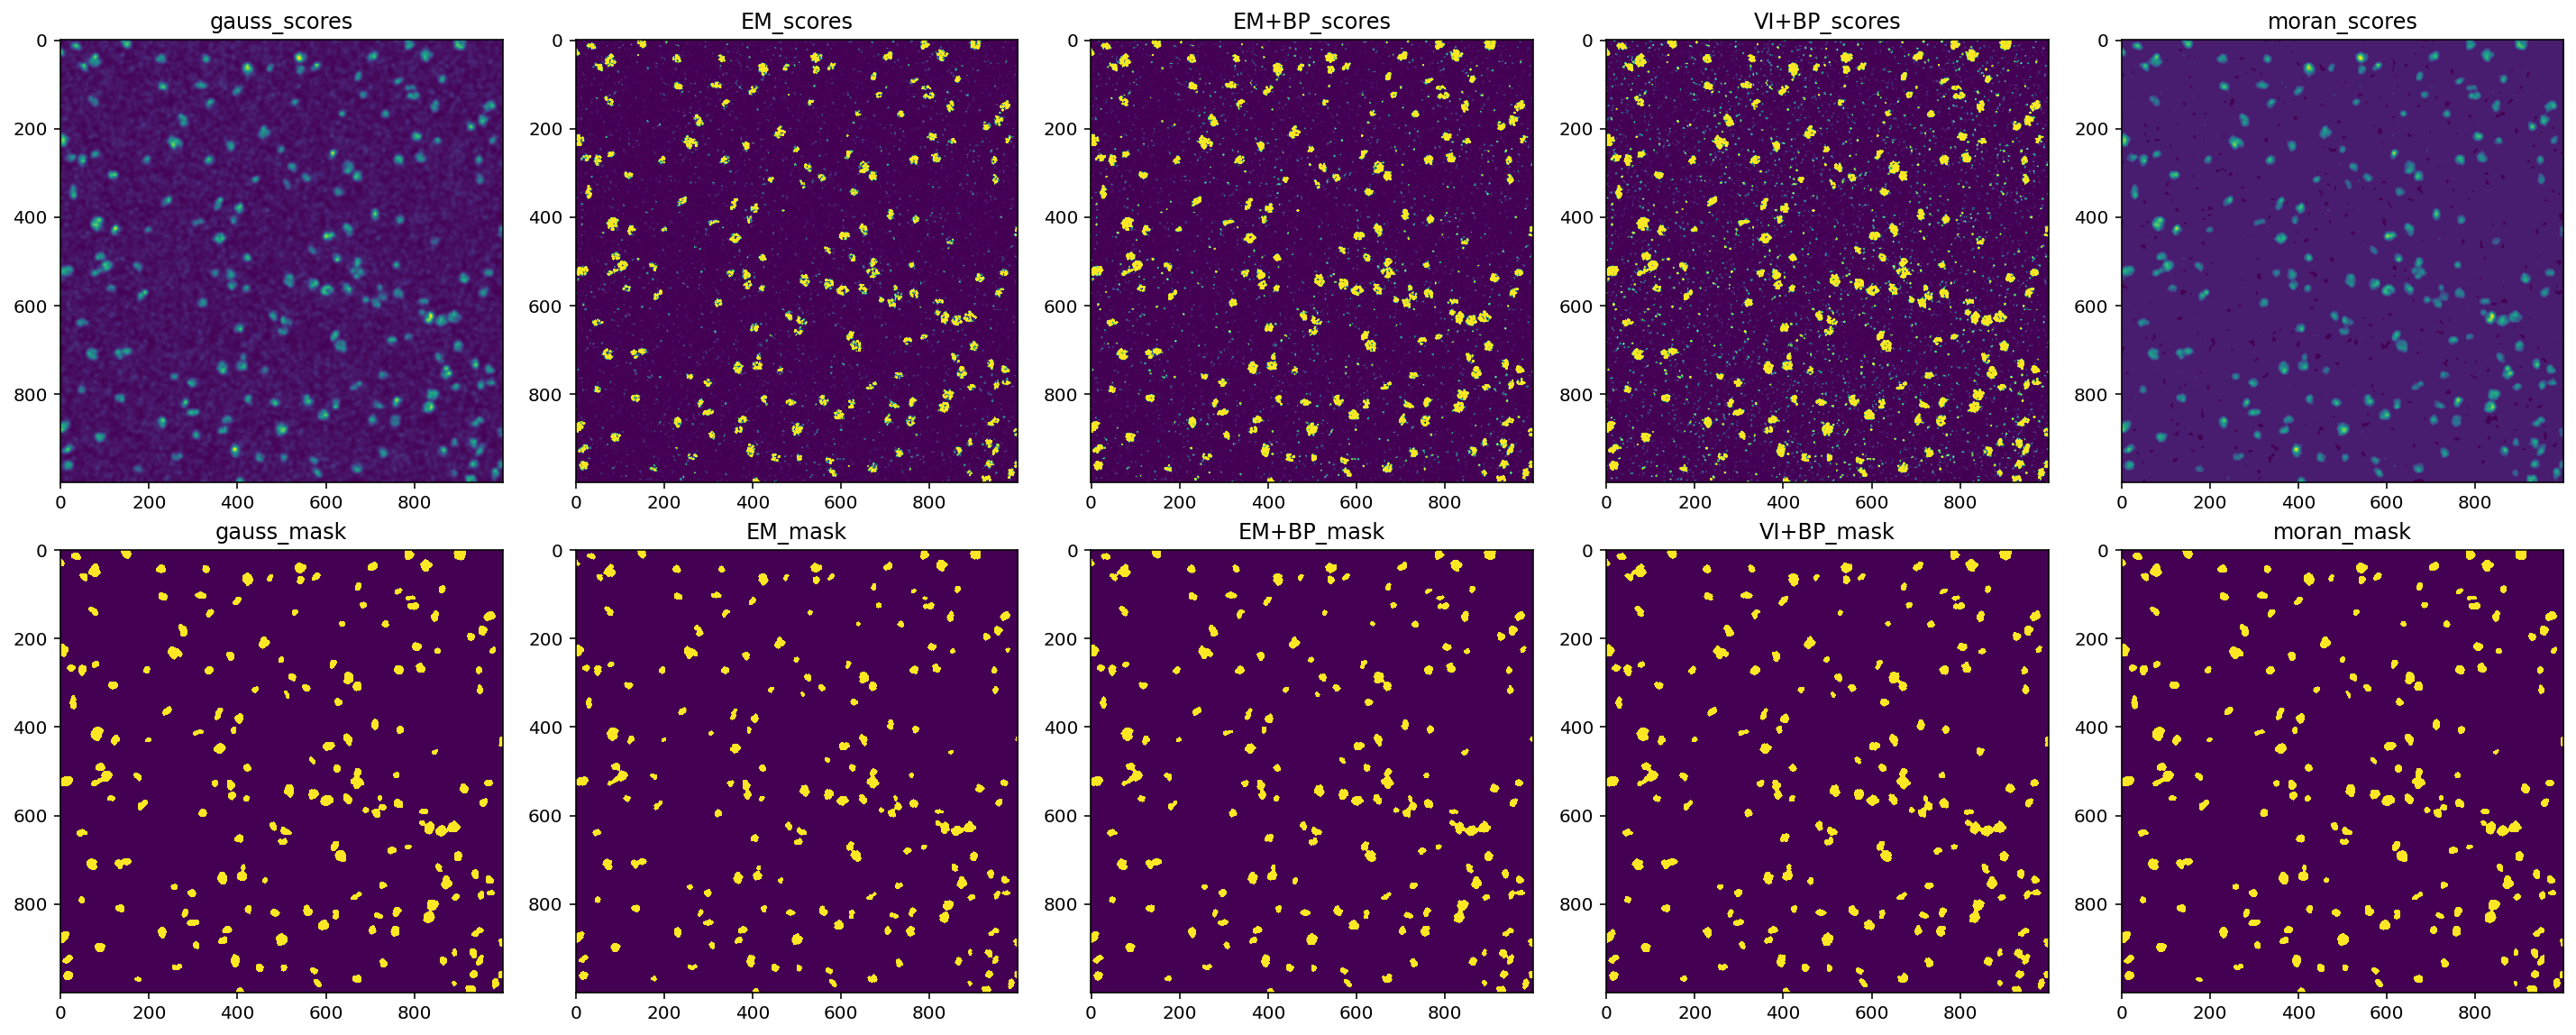

In [135]:
methods = ['gauss', 'EM', 'EM+BP', 'VI+BP', 'moran']
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(4*5, 4*2), tight_layout=True)
for i, method in enumerate(methods):
    st.pl.imshow(adata, f'{method}_scores', ax=axes[:,i][0])
    st.pl.imshow(adata, f'{method}_mask', ax=axes[:,i][1])